## L1 - Linear models and gradient descent

### Books
1. [Deep Learning, I. Goodfellow, Y. Bengio and A. Courville](http://www.deeplearningbook.org/)
2. [Neural networks for pattern recognition, C. Bishop](http://cs.du.edu/~mitchell/mario_books/Neural_Networks_for_Pattern_Recognition_-_Christopher_Bishop.pdf)
3. [Machine learning: a probabilistic perspective, K. Murphy](http://dsd.future-lab.cn/members/2015nlp/Machine_Learning.pdf)

### 0. Basic classification

Here you can see basic (possible, non standard) classification of [machine learning](https://en.wikipedia.org/wiki/Machine_learning) tasks.
1. [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)
 1. [Regression](https://en.wikipedia.org/wiki/Regression_analysis)
 2. [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
 3. [Ranking](https://en.wikipedia.org/wiki/Learning_to_rank)
2. [Reinforcment learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
3. [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
 1. Clustering 
 2. Manifold learning
 3. Matrix decompostion (factorization)
 4. Dimension reduction
 
In this lab we consider only supervised learning. Namely, linear regression and binary linear classification, as simple methods for beginning.

### 1. Supervised learning basics
A supervised learning algorithm is an algorithm that is able to learn from data. Now we need only to clarify what is data and what it means to learn?

Let $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{X} = \mathbb{R}^{n}$ and $\{y_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{Y}$. Here $\mathbb{X}$ is the whole set of objects and $\mathbb{Y}$ is all possible labels of objects, so $\{x_i\}_{i=1}^{\mathcal{l}}$ is subset with known labels $\{y_i\}_{i=1}^{\mathcal{l}}$. We want to find algorithm, that can predict $y$ for any $x \in \mathbb{X}$. Actually, $x = (x^1, \dots, x^n)$ is some vector of features (formal description), but $x^k$ can have different nature. 

* $x^k \in \{0, 1\}$ – binary feature, boolean flag
* $x^k \in \{1,\dots, m\}$ – categorical (nominal), classification of entities into particular categories.
* $x^k \in \{1,\dots, m\}^<$ – ordinal, classification of entities in some kind of ordered relationship.
* $x^k \in \mathbb{R}$ – cardinal, classification based on a numerical value.

Categorical features are commonly encoded in some way (for exaple [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)) to ignore false ordering (important for metric algorithms). Moreover it's possible to cast any type of feature to $\mathbb{R}$, that's why we suppouse that $\mathbb{X} = \mathbb{R}^{n}$ further.

Process of finding algorithm, that can predict labels, is called training. Usually, it is reduced to minimization problem of the empirical risk.
$$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{\mathcal{l}}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(f(x_i | \theta), y_i).$$
Here $\mathcal{L}$ – some loss function that shows how good we predict $y$, and $f(x|\theta)$ is parametric function, where $\theta \in \Theta$.

### 2. Linear regression
For regression task $\mathbb{Y} = \mathbb{R}$. In case of linear model we have learning vector of parameters $w \in \mathbb{R}^n$ and predict $y$ as 
$$y = w^Tx + b.$$

For simplicity, let the last element of $x$ is always $1$ and $w$ is concatenation of $[w, b]$. So, we can rewrite model as $y = w^Tx$. For MSE (mean square error) we have following optimization problem
$$\arg \min_{w} Q(w) = \arg \min_{w} \sum_{i=1}^{\mathcal{l}}\big(w^Tx_i - y_i\big)^2.$$

Let $X$ is matrix, where $i$-th row is feature vector of $i$-th object and $Y$ – vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$

#### Exercises
1. Let $y = sin(x) + \varepsilon$, where $x \in [0, 2\pi]$ and $\varepsilon \sim \mathcal{N}(0, 0.1)$. Generate 20 train samples and try to learn regression model.
2. Plot train data and model's predictions.
3. As you see, model has no enough capacity to fit train data. Let's add polynomial features, namely $x^2$ and $x^3$.
4. Train linear model one more time and plot results again.
5. What happens if you add more features, for example full range $x^{0},\dots,x^{7}$? 

In [1]:
# add all libraries
import numpy as np
import pandas as pd
from numpy.polynomial.polynomial import Polynomial as poly
from matplotlib import pyplot as plt
plt.style.use('seaborn')
from matplotlib import cm
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

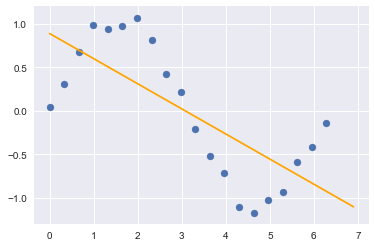

In [2]:
np.random.seed(42)
X_train = np.linspace(0, 2 * np.pi, 20)
y_train = np.sin(X_train) + np.random.normal(0, 0.1, 20)


def lin_reg_analitical(X, y, deg=1):
    features = np.column_stack([X**i for i in range(deg, -1, -1)])
    weights = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(y)
    return weights


weights_deg_1 = lin_reg_analitical(X_train, y_train)

x = np.arange(0, 7, 0.1)
deg_1_approx = poly(np.flip(weights_deg_1, 0))

plt.scatter(X_train, y_train)
plt.plot(x, deg_1_approx(x), color='orange')
plt.show()

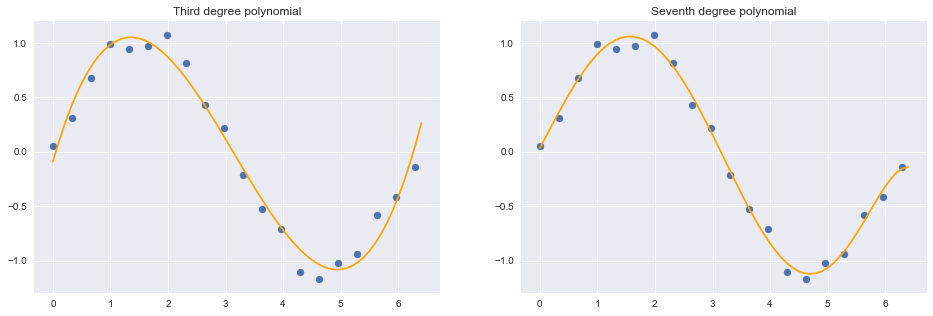

In [3]:
weights_deg_3 = lin_reg_analitical(X_train, y_train, deg=3)
weights_deg_7 = lin_reg_analitical(X_train, y_train, deg=7)


x = np.arange(0, 6.5, 0.1)
deg_3_approx = poly(np.flip(weights_deg_3, 0))
deg_7_approx = poly(np.flip(weights_deg_7, 0))


plt.figure(1, figsize=(16,5))

plt.subplot(121)
plt.title("Third degree polynomial")
plt.scatter(X_train, y_train)
plt.plot(x, deg_3_approx(x), color='orange')

plt.subplot(122)
plt.title("Seventh degree polynomial")
plt.scatter(X_train, y_train)
plt.plot(x, deg_7_approx(x), color='orange')

plt.show()

### 3. Validation
The data used to build the final model usually comes from multiple datasets. In particular, three data sets are commonly used in different stages of the creation of the model.

1. We initially fit our parameters on a __training dataset__, that consists of pairs of a feature vector and the corresponding answer. The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

2. Second one called the __validation dataset__. The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. regularization coefficient or number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. This simple procedure is complicated in practice by the fact that the validation dataset's error may fluctuate during training. This complication has led to the creation of many ad-hoc rules for deciding when overfitting has truly begun.

3. Finally, the __test dataset__ is a dataset used to provide an unbiased evaluation of a final trained model.

Cross-validation is a validation technique for estimating how accurately a predictive model will perform in practice. The goal of cross validation is to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset.

Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset and making validation on the other. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are caveraged over the rounds to estimate a final predictive model.

There are following types:
1. Leave-p-out cross-validation - using p observations as the validation set with all possible ways.
2. k-fold cross-validation - split data into k folds and using each one as validation set.
3. Holdout validation - randomly split data into training and validation set
4. Repeated random sub-sampling validation - repeatedly make random splits of data into training and validation set

#### Exercises
1. Generate 20 validation samples
2. Check quality of your model on train set and validation set.
3. Have you experienced [overfitting](https://en.wikipedia.org/wiki/Overfitting)?
4. Please, read [this article](https://en.wikipedia.org/wiki/VC_dimension) to learn more about model capacity and VC-dimension.

Error on train set: 0.003941
Error on validation set: 0.018755


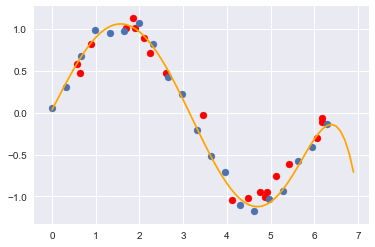

In [4]:
np.random.seed(100500)

X_test = np.random.uniform(0, 2 * np.pi, 20)
y_test = np.sin(X_test) + np.random.normal(0, 0.1, 20)

plt.scatter(X_test, y_test, color='red')
plt.scatter(X_train, y_train)

x = np.arange(0, 7, 0.1)
plt.plot(x, deg_7_approx(x), color='orange')

train_set_mse = np.square(deg_7_approx(X_train) - y_train).mean()
test_set_mse = np.square(deg_7_approx(X_test) - y_test).mean()

print("Error on train set: {:.6f}\n"
      "Error on validation set: {:.6f}".format(train_set_mse, test_set_mse))

We can clearly see, that for the 7-th degree polynomial error on test set is almost $10$ times bigger than error on training set. The reason can be seen one cell above. Seventh degree polynomial is going through more points of training set, this makes solution less general.

### 4. Binary linear classification
Let $\mathbb{Y} = \{-1, +1\}$ for binary classification. So linear model looks like
$$sign(w^Tx + b),$$
where $w$ is normal to the separating plane, which is defined parametrically $w^Tx+b=0$. In the half-space, which normal is directed, all points has class +1, otherwise -1. Let's assume that all points of hyperplane has class +1 to resolve the ambiguity. Also we rewrite model in the short variant $sign(w^Tx)$.

As with regression, training of linear classifier may be reduced to an optimization problem. We only have to specify the loss function. The most nature option is
$$\mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M < 0],$$
where $M$ is the margin value $yw^Tx$, which indicates how far the classifier puts a point in its class. But this loss has one drawback, it's not differentiable. That's why the optimization problem becomes very complex. However we can use any other function, which majorizes this loss. You can find some popular options below

1. MSE has one big advantage, we optimize convex function with a local minimum. Moreover analytic solution exists.
$$\big(w^Tx - y \big)^2$$

2. Hinge loss function makes our linear classifier [SVM](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine).
$$max \big(0, 1 - yw^Tx \big)$$

3. Logistic loss function has a probabilistic meaning. In particular, this loss leads us to the optimal [Bayesian classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) under certain assumptions on the distribution of features. But it's a different story. So it is often used in practice.
$$\ln \big( 1 + \exp(-yw^Tx) \big)$$

#### Exercises
1. Let $\mathbb{P}\{y=1|x\} = \sigma(w^Tx)$, where $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Show that problem below it is nothing like the maximization of the likelihood.
$$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$
2. Plot all loss functions in the axes $M \times L$.
3. Generate two normally distributed sets of points on the plane.
4. Let points of 1th set (red color) have class +1 and point of 2d set (blue color) have -1.
5. Train linear classifier with MSE (use analytical solution), which splits these sets.
6. Plot points and separating line of trained classifier.
7. What is time comlexity of your solution?

**Question 1 solution.**

Lets denote known $y$ value as $y_{true}$, so we need to show that maximization of probability $\Pr = \prod \limits_{x,y} \mathbb{P}\{y = y_{true}|x\} \rightarrow \max$ is equivalent to the minimization of logistic loss function. Maximization of probability is in fact the same as maximizing the logarithm of probability, so we can write:
$$
    \ln \Pr = \sum \limits_{x,y} \ln(\mathbb{P}\{y = y_{true} | x\}) = 
      \sum \limits_{x, y=1} \ln(\mathbb{P}\{y = 1 | x\})
    + \sum \limits_{x, y=-1} \ln(1 - \mathbb{P}\{y = 1 | x\})
$$

We've showed that our initial problem (maximization of the likelihood) is iquivalent to:
$$
    \max_w \left\{  \sum \limits_{x, y=1} \ln(\mathbb{P}\{y = 1 | x\})
                  + \sum \limits_{x, y=-1} \ln(1 - \mathbb{P}\{y = 1 | x\}) \right\}  \sim 
    \max_w \left\{  \sum \limits_{x, y=1} \ln(\sigma(w^Tx))
                  + \sum \limits_{x, y=-1} \ln(1 - \sigma(w^Tx)) \right\}
$$

Now lets consider second problem (minimization of logistic loss function). We can rewrite expresion as follows:
$$
    \arg \min_w \sum \limits_{x, y} \ln(1 + \exp(-yw^Tx)) = \arg \max_w \sum \limits_{x, y} \ln (\sigma(yw^Tx)) = 
    \arg \max_w \left\{\sum_{x, y=1}\ln(\sigma(w^Tx)) + \sum_{x,y=-1}\ln(1 - \sigma(w^Tx)) \right\}
$$

Second transition is viable because we have equality:
$$\sigma(-w^Tx) = \frac{1}{e^{w^Tx} + 1} = 1 - \frac{1}{1 + e^{-w^Tx}} = 1 - \sigma(w^Tx)$$
(we can write $-w^Tx$ because all $y = -1$ in the second sum).

As we can see we have proven that the maximization of the likelihood is no different to the maximization of:

$$
    \arg \max_w \left\{\sum_{x, y=1}\ln(\sigma(w^Tx)) + \sum_{x,y=-1}\ln(1 - \sigma(w^Tx)) \right\}
$$

we've also showed that minimization of logic loss is no different to the maximization of this exact formula, this proofs that maximization of the likelihood is equivalent to the minimization of logistic loss function.

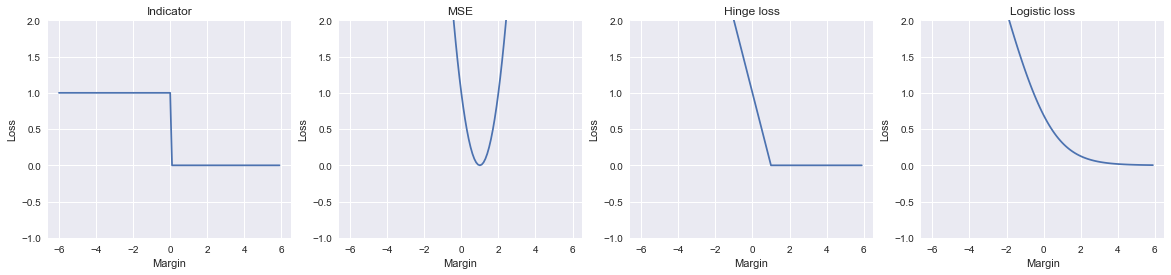

In [5]:
M = np.arange(-6, 6, .1)

plt.figure(2, figsize=(20, 4))

plt.subplot(141)
plt.plot(M, M < 0)
plt.xlabel('Margin')
plt.ylabel('Loss')
plt.title('Indicator')
plt.ylim(-1,2)

plt.subplot(142)
plt.plot(M, (M - 1)**2)
plt.xlabel('Margin')
plt.ylabel('Loss')
plt.title('MSE')
plt.ylim(-1,2)

plt.subplot(143)
plt.plot(M, np.maximum(0, 1 - M))
plt.xlabel('Margin')
plt.ylabel('Loss')
plt.title('Hinge loss')
plt.ylim(-1,2)

plt.subplot(144)
plt.plot(M, np.log(1 + np.exp(-M)))
plt.xlabel('Margin')
plt.ylabel('Loss')
plt.title('Logistic loss')
plt.ylim(-1,2)

plt.show()

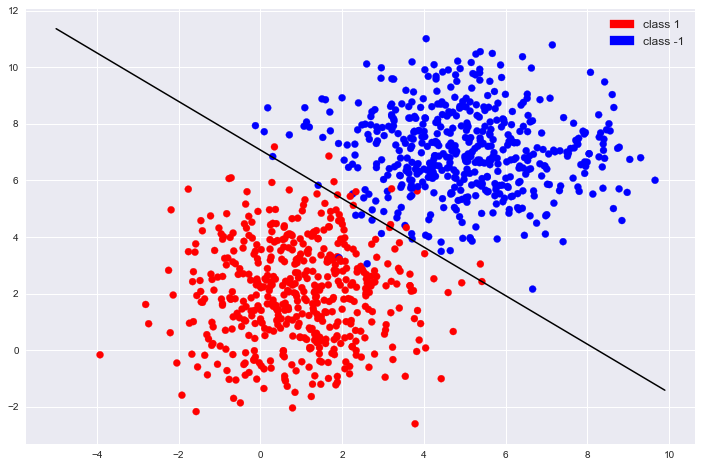

In [6]:
def generate_two_classes(points_count=500):
    np.random.seed(1231)

    positive_points = np.random.multivariate_normal((1, 2), [[2, 0], [0, 3]], points_count)
    negative_points = np.random.multivariate_normal((5, 7), [[2.5, 0], [0, 2]], points_count)

    X = np.concatenate((positive_points, negative_points), axis=0)
    y = np.concatenate((np.ones(positive_points.shape[0]), 
                       -np.ones(negative_points.shape[0])), axis=0)
    X = np.column_stack((X, np.ones(X.shape[0])))
    
    perm = np.random.permutation(len(X))
    X, y = X[perm], y[perm]
    
    return X, y


def get_separating_line(weights):
    *normal_vector, constant = weights
    return lambda x: -normal_vector[0] / normal_vector[1] * x \
                     - constant / normal_vector[1]

def lin_clf_analitical(X, y):
    weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return weights

X_train, y_train = generate_two_classes()

sep_line_analitical = get_separating_line(lin_clf_analitical(X_train, y_train))
x = np.arange(-5, 10, .1)

plt.figure(figsize=(12, 8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')
plt.plot(x, sep_line_analitical(x), c='black', lw=1.5)

red_patch = mpatches.Patch(color='red', label='class 1')
blue_patch = mpatches.Patch(color='blue', label='class -1')
plt.legend(handles=[red_patch, blue_patch], prop={'size': 12})

**Time complexity**

Let's show that complexity is $O(k^3 + k^2N)$ (where $N, k$ are number of objects and features). First of all the complexity of multiplying two matrices with dimensions $[k \times N]$ and $[N \times k]$ is $O(k^2N)$. And complexity of finding the inverse matrix is $O(k^3)$ (where $k$ is dimension of this matrix). As a result we have complexity (3 matrix multiplications and one inverse)

### 5. Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Gradient descent is based on the observation that if function $Q(x)$ is defined and differentiable in a neighborhood of a point $x$, then $Q(x)$ decreases fastest if one goes from $x$  in the direction of the negative gradient.

$$x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$$

Here $\lambda$ is step of descent and  $k$ – step number. If $\lambda$ is too large then algorithm may not converge, otherwise training can last a long time. Also there is rather popular hack to slowly decrease $\lambda$ with each step. You need to understand that gradient descent finds exactly local minimum. The easiest way to fight this problem is make several runs of algorithm or have good initialization.

#### Exercises
1. Suggest some quadratic function $Q: \mathbb{R}^2 \rightarrow \mathbb{R}$ with global minimum.
2. Find minimum with gradient descent method.
3. Plot contour lines.
4. Trace the path of gradient descent.
5. How do you choose $\lambda$?
6. Evaluate time complexity of solution.

We can use  $f(x,y) = (x - 3)^2 + (y + 2)^2$ (eliptic poraboloid). It reaches it's minimum at point $(3, -2)$. We can easily find partial derivatives and gradient:

$$
    \begin{align}
        &\frac{\partial}{\partial x} f(x, y) = 2x - 6 \\[2pt]
        &\frac{\partial}{\partial y} f(x, y) = 2y + 4  \\[2pt]
        &\triangledown f(x, y) = (2x - 6, 2y + 4)
    \end{align}
$$

In [7]:
def func(x, y):
    return (x - 3)**2 + (y + 2)**2

def deriv(x, y):
    return np.array([2*x - 6, 2*y + 4])


def gradient_descent(f, df, x_init, step=1e-3, eps=1e-6, max_iters=10000, path=None):
    delta = 1
    cur_point = x_init
    iter_count = 0
    
    while delta > eps and iter_count < max_iters:    
        gradient = df(*cur_point)
        new_point = cur_point - step * gradient
        delta = np.sqrt(np.sum((new_point - cur_point)**2))
        cur_point = new_point
        iter_count += 1
        
        if path is not None:
            path = np.append(path, [cur_point], axis=0)
        
    print("Finished Iterations:", iter_count)
    if path is None:
        return cur_point
    else:
        return cur_point, path

Finished Iterations: 9454
Minimum found: 0.000 at point (3.000, -2.000)


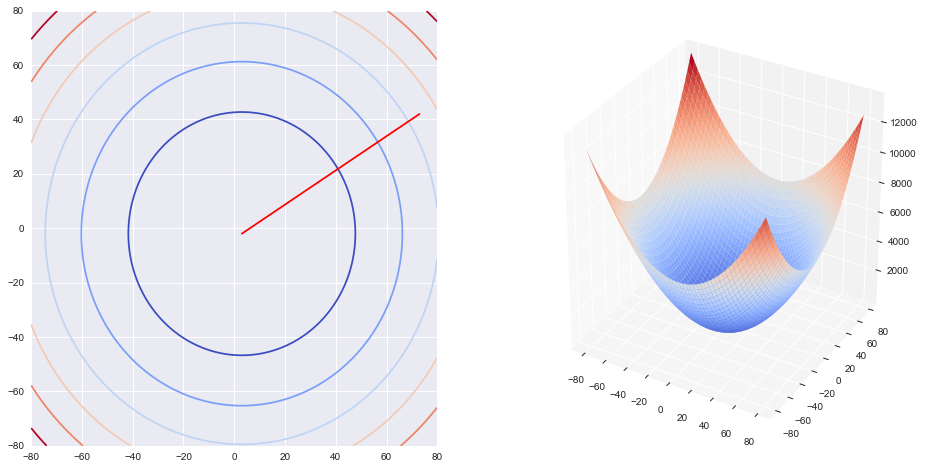

In [8]:
x = np.arange(-80.0, 80.0, .1)
y = np.arange(-80.0, 80.0, .1)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

start_point = np.array([73, 42])
min_point, descent_path = gradient_descent(
                                                    f=func,
                                                    df=deriv,
                                                    x_init=start_point,
                                                    step=1e-3,
                                                    eps=1e-9,
                                                    path=np.array([start_point])
                                                  )

print("Minimum found: {0:.3f} at point ({1[0]:.3f}, {1[1]:.3f})".format(func(*min_point), min_point))

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(121)
ax.contour(X, Y, Z, cmap=cm.coolwarm)
ax.plot(descent_path[:,0], descent_path[:,1], marker='', color='r')

ax = fig.add_subplot(122, projection='3d')
ax.set_facecolor('white')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

plt.show()

There is category of function which naive gradient descent works poorly for, e.g. [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).

$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

#### Exercises
1. Repeat previous steps for Rosenbrock function.
2. What problem do you face?
3. Is there any solution?

In [9]:
def rosenbrock_func(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(x, y):
    return np.array([400*x**3 - 400*x*y + 2*x - 2,
                     200*y - 200*x**2])

Finished Iterations: 10000
Minimum found: 0.000058 at point (0.992, 0.985)


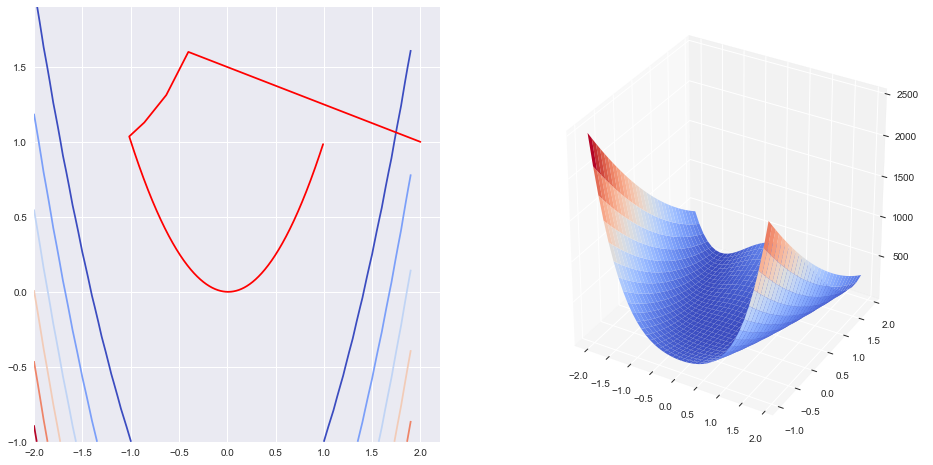

In [10]:
x = np.arange(-2, 2, .1)
y = np.arange(-1, 2, .1)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)

start_point = np.array([2, 1])
min_point, descent_path = gradient_descent(f=rosenbrock_func,
                                                                  df=rosenbrock_grad,
                                                                  x_init=start_point,
                                                                  step=1e-3,
                                                                  eps=1e-10,
                                                                  path=np.array([start_point]))


print("Minimum found: {0:.6f} "
      "at point ({1[0]:.3f}, {1[1]:.3f})".format(rosenbrock_func(*min_point), min_point))

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(121)
ax.contour(X, Y, Z, cmap=cm.coolwarm)
ax.plot(descent_path[:,0], descent_path[:,1], marker='', color='r')

ax = fig.add_subplot(122, projection='3d')
ax.set_facecolor('white')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

plt.show()

#### Problem

Main problem, is that algorithm stops working too early because, near the point $(1, 1)$ (which is actual maximum), function changes insignificantly (this causes algorithm to stop). One solution is decreasing step size (and eps) to have more precision, but this will increase the time.

There are some variations of the method, for example steepest descent, where we find optimal $\lambda$ for each step.

$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k)).$$

#### Exercises
1. Split red and blue sets of points again. Train linear model using gradient descent and MSE.
2. Plot your splitting line. Compare with analytical solution.
3. Try steepest descent.
4. Comare gradient descent methods and show its convergence in axes $[step \times Q]$.

---

In order to use gradient descent, we should be able to compute gradient quicly. Let's find the formula for it. Let $X$ is matrix, where $i$-th row is feature vector of $i$-th object and $Y$ – vector of labels. We need to find gradient of a function: $Q = ||Xw - Y ||_{2}$. Partial derivative would be:
$$
    \frac{\partial Q}{\partial w_j} = 2 \sum \limits_{i = 1}^l x_i^{(j)} (wx_i - y_i) 
                                    = 2\left(X^{(j)}\right)^T (Xw - Y)
$$

Then, gradient we can write gradient as follows:

$$
    \triangledown Q(w) = 2 \cdot X^T(Xw - Y)
$$

Now we can code gradient descent

Finished. Iterations:  1523


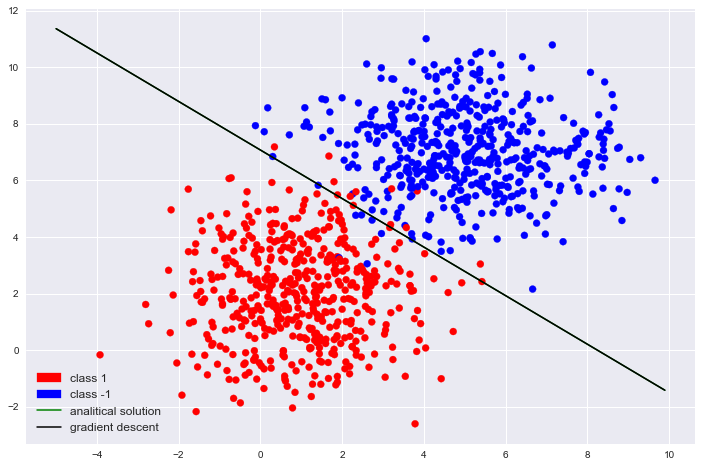

In [11]:
def mean_square_error(X, Y, w):
    return np.sum((X.dot(w) - Y)**2) / X.shape[0]

def gradient_func(X, Y, w):
    return 2 * X.T.dot(X.dot(w) - Y) / X.shape[0]

def gradient_descent_multivar(X, Y, f, df, 
                              x_init, step=1e-3, eps=1e-6, max_iters=10000,
                              graph=None):
    
    delta_f = 1
    cur_point = x_init
    iters_count = 0
    
    while iters_count < max_iters and delta_f > eps:
        if graph is not None:
            graph.append(f(X, Y, cur_point))

        gradient = df(X, Y, cur_point)
        new_point = cur_point - step * gradient
        delta_f = f(X, Y, cur_point) - f(X, Y, new_point)
        cur_point = new_point
        iters_count += 1
        
    print("Finished. Iterations: ", iters_count)
    if graph is None:
        return cur_point
    else:
        return cur_point, graph

X_train, y_train = generate_two_classes()

clf_descent_weights = gradient_descent_multivar(X=X_train,
                                                Y=y_train,
                                                f=mean_square_error,
                                                df=gradient_func,
                                                x_init=np.zeros(3),
                                                step=1e-2,
                                                eps=1e-10)

sep_line_descent = get_separating_line(clf_descent_weights)
x = np.arange(-5, 10, .1)

plt.figure(figsize=(12, 8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')
line1, = plt.plot(x, sep_line_analitical(x), c='green', lw=1.5, label='analitical solution')
line2, = plt.plot(x, sep_line_descent(x), c='black', lw=1.5, label='gradient descent')


red_patch = mpatches.Patch(color='red', label='class 1')
blue_patch = mpatches.Patch(color='blue', label='class -1')
plt.legend(handles=[red_patch, blue_patch, line1, line2], prop={'size': 12})

plt.show()

This solution is almost identical to analytical.

---

Now we need to calculate the derivative of $Q(x_k - \lambda \triangledown Q(x_k))$, where $Q$ is mean square error: $Q(w) = ||Xw - Y||_2$. In our case $w = x_k - \lambda \triangledown Q(x_k)$. Substituting $w$ and differentiating by $\lambda$ we have the following:

$$
    Q'(w) = d\left(||Xx_k - \lambda X\triangledown Q(x_k) - Y||_2 \right)/d \lambda
$$

Now we can differentiate every square by the chain rule, this yields:

$$
    Q'(w) = \sum_{x,y} -2(x x_k - \lambda x \triangledown Q(x_k) - y)x \triangledown Q(x_k)
$$

Now lets denote:

$$
    \begin{align}
        &p = X x_k \\
        &q = X \triangledown Q(x_k)
    \end{align}
$$

$\sum p_i$ and $\sum q_i$ -- sums of elements in appropriate vectors. Now we can write simple expresion for the point of minimum:

$$
    \lambda = \frac{(\sum p_i - \sum y)\sum q_i}{\sum q_i^2}
$$

Finished. Iterations: 165


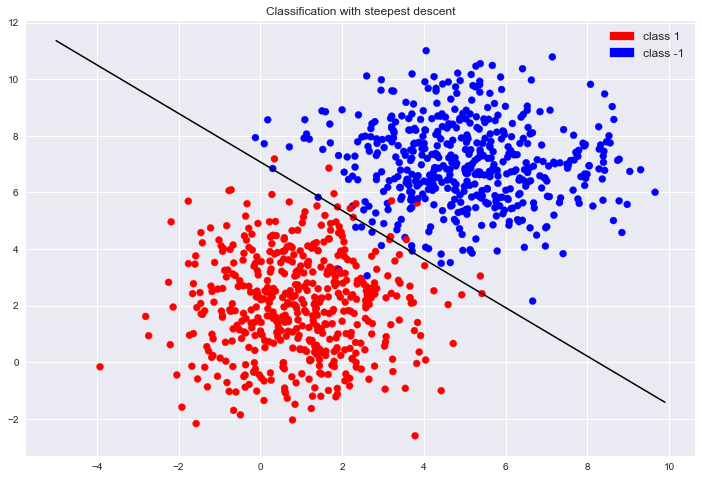

In [12]:
def steepest_gradient_descent(X, Y, f, df, 
                              x_init, eps=1e-6, max_iters=10000,
                              graph=None):
    
    def calculate_step(point):
        gradient_at_point = df(X, Y, point)
        p = X.dot(point)
        q = X.dot(gradient_at_point)
        return np.sum(q * (p - Y)) / np.sum(q**2)
    
    delta_f = 10
    cur_point = x_init
    
    iters_count = 0
    while iters_count < max_iters and delta_f > eps:
        if graph is not None:
            graph.append(f(X, Y, cur_point))
        
        gradient = df(X, Y, cur_point)
        step = calculate_step(cur_point)
        new_point = cur_point - step * gradient
        delta_f = f(X, Y, cur_point) - f(X, Y, new_point)
        cur_point = new_point
        
        iters_count += 1
    
    print("Finished. Iterations:", iters_count)
    if graph is None:
        return cur_point
    else:
        return cur_point, graph

steepest_descent_weights = steepest_gradient_descent(X=X_train,
                                                     Y=y_train,
                                                     f=mean_square_error,
                                                     df=gradient_func,
                                                     x_init=np.zeros(3),
                                                     eps=1e-10)


sep_line_steepest_descent = get_separating_line(steepest_descent_weights)
x = np.arange(-5, 10, .1)

plt.figure(figsize=(12, 8))

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')
plt.plot(x, sep_line_steepest_descent(x), c='black', lw=1.5)

red_patch = mpatches.Patch(color='red', label='class 1')
blue_patch = mpatches.Patch(color='blue', label='class -1')
plt.legend(handles=[red_patch, blue_patch], prop={'size': 12})
plt.title('Classification with steepest descent')

plt.show()

Finished. Iterations: 200
Finished. Iterations:  200


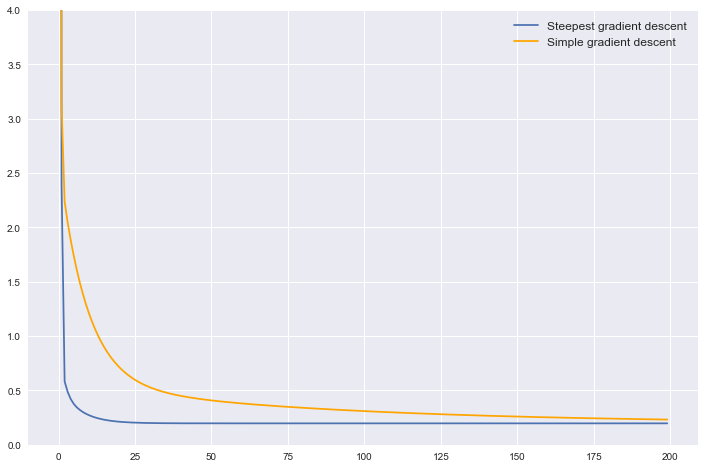

In [13]:
start_point = np.array([1.1, .2, .3])

point, steepest_descent_graph = steepest_gradient_descent(X=X_train,
                                                          Y=y_train,
                                                          f=mean_square_error,
                                                          df=gradient_func,
                                                          x_init=start_point,
                                                          eps=-1, # don't break, when insignificant changes
                                                          max_iters=200,
                                                          graph=[])

point, descent_graph = gradient_descent_multivar(X=X_train,
                                                 Y=y_train,
                                                 f=mean_square_error,
                                                 df=gradient_func,
                                                 x_init=start_point,
                                                 step=1e-2,
                                                 eps=-1,
                                                 max_iters=200,
                                                 graph=[])



plt.figure(figsize=(12, 8))
line1, = plt.plot(range(len(steepest_descent_graph)),
                  steepest_descent_graph,
                  label="Steepest gradient descent")
line2, = plt.plot(range(len(descent_graph)),
                  descent_graph,
                  color='orange', label="Simple gradient descent")

plt.ylim(0,4)
plt.legend(handles=[line1, line2], prop={'size': 12})
plt.show()

_In conclusion_: steepest descent converges in less steps, than average gradient descent, but we have to do more computation at each step with steepest gradient descent (matrix multiplication, when computing step).

### 6. Stochastic gradient descent

Sometimes you have so huge amount of data, that usual gradient descent becomes too slow. One more option, we have deal with data flow. In this case stochastic gradient method appears on the stage. The idea is simple. You can do a descent step, calculating error and gradient not for all samples, but for some small batch only.

#### Еxercises
1. Download [mnist](https://www.kaggle.com/c/digit-recognizer).
2. Train linear classificator for digits 0 and 1, using logistic loss function and stochastic gradient descent.
3. Use holdout to check [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) of classification.
4. How do accuracy and training time depend on bathch size?
5. Plot graphic that proves your words.
6. How many epochs you use? Why?
7. Plot value of loss function for each step (try use [exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)).

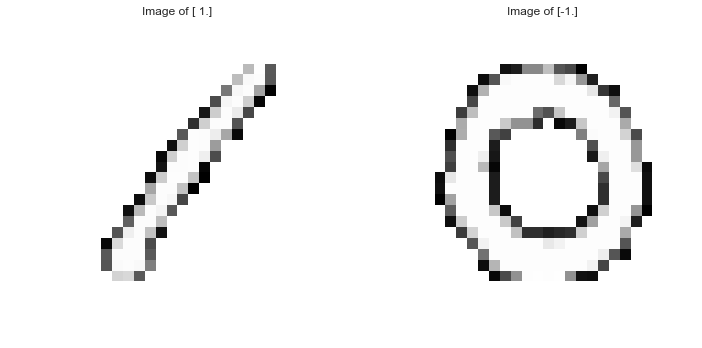

In [14]:
# load mnist and extract ones and zeros
import pandas as pd
df = pd.read_csv('mnist.csv')
ones_and_zeros = df[(df['label'] == 0) | (df['label'] == 1)].copy()
ones_and_zeros.loc[:,'label'].replace({0:-1}, inplace=True)

labels = ones_and_zeros.iloc[:,:1].values.astype('float64')
features = ones_and_zeros.iloc[:,1:].values.astype('float64')
features = np.column_stack([features, np.ones(features.shape[0])])

one_im = (np.reshape(features[0,:-1], (28, 28)) * 255).astype(np.uint8)
zero_im = (np.reshape(features[1,:-1], (28, 28)) * 255).astype(np.uint8)

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.axis('off')
plt.imshow(one_im, cmap='binary')
plt.title("Image of {}".format(labels[0]))

plt.subplot(122)
plt.axis('off')
plt.imshow(zero_im, cmap='binary')
plt.title("Image of {}".format(labels[1]))

plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
X_test = X_test[:,:-1]

def log_loss(X, y, w):
    loss = 0.0
    N = X.shape[0]
    for i in range(N):
        power = -y[i] * w.dot(X[i])
        if power > 20.0:
            loss += power
        else:
            loss += np.log(1 + np.exp(power))
    return loss[0] / N

def log_grad(X, y, w):
    gradient = np.zeros(w.shape)
    N = X.shape[0]
    for i in range(N):
        power = -y[i] * w.dot(X[i])
        exp = power
        if power <= 20.0:
            exp = np.log(1 + np.exp(power))
        gradient += -X[i] * y[i] * exp / (1 + exp)
    return gradient / N

In [16]:
initial_params = np.zeros(X_train.shape[1])

def get_batches(X, y, size=50):
    N = X.shape[0]
    perm = np.random.permutation(N)
    X, y = X[perm], y[perm]
    for start in range(0, N, size):
        yield X[start:start+size,:], y[start:start+size]


def fit_stochastic_gd(X, y, loss_func, loss_grad,
                      w_init, step=0.01, batch_size=50, n_epochs=5,
                      loss_vals=None):
    
    cur_point = w_init
    iters_count = 0

    for i in range(n_epochs):
        for (X_batch, y_batch) in get_batches(X, y, size=batch_size):
            if loss_vals is not None:
                loss_vals.append(loss_func(X, y, cur_point))
            
            cur_point -= step * loss_grad(X_batch, y_batch, cur_point)
            iters_count += 1

    if loss_vals is None:
        return cur_point, iters_count
    else:
        return cur_point, iters_count, loss_vals

min_point, _ = fit_stochastic_gd(X_train, y_train,
                                 loss_func=log_loss,
                                 loss_grad=log_grad,
                                 w_init=initial_params,
                                 step=0.1,
                                 batch_size=50,
                                 n_epochs=8)

def get_classifier(weights):
    *normal_vector, constant = weights
    return lambda x: np.sign(x.dot(normal_vector) + constant)

stochastic_descent_clf = get_classifier(min_point)
y_pred = [stochastic_descent_clf(image) for image in X_test]
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))

Accuracy on test set:  0.99793814433


_How do accuracy and training time depend on bathch size?_: training time and accuracy decreases with increase of batch size. This is because, the smaller batch size we have, the more gradients we will compute. This is why algorithm works slower on smaller batches, but this is also a reason why accuracy is higher (algorithms makes more steps).

In [17]:
from IPython.display import clear_output
time = []
accuracy = []

for n in range(50, X_train.shape[0], 100):
    clear_output(wait=True)
    print("{} of {}".format(n, X_train.shape[0]))
    
    min_point, iters_count = fit_stochastic_gd(X_train, y_train,
                                               loss_func=log_loss,
                                               loss_grad=log_grad,
                                               w_init=np.zeros(X_train.shape[1]),
                                               step=0.1,
                                               batch_size=n,
                                               n_epochs=8)
    
    time.append(iters_count)
    stochastic_descent_clf = get_classifier(min_point)
    y_pred = [stochastic_descent_clf(image) for image in X_test]
    accuracy.append(accuracy_score(y_test, y_pred))

clear_output()

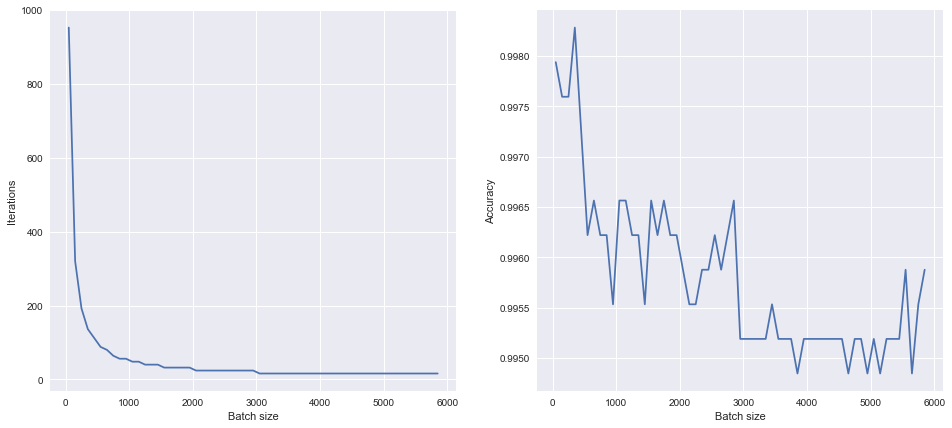

In [18]:
x = range(50, X_train.shape[0], 100)

plt.figure(figsize=(16, 7))

plt.subplot(121)
plt.plot(x, time)
plt.xlabel("Batch size")
plt.ylabel("Iterations")

plt.subplot(122)
plt.plot(x, accuracy)
plt.xlabel("Batch size")
plt.ylabel("Accuracy")

plt.show()

_How many epochs you use? Why?_ I use $8$ epochs, after testing this algorithm with less epochs. With $8$ I've got best accuaracy/time ratio.

In [19]:
random_params = np.zeros(X_train.shape[1])

*_, loss_graph = fit_stochastic_gd(X_train, y_train,
                                   loss_func=log_loss,
                                   loss_grad=log_grad,
                                   w_init=random_params,
                                   step=0.1,
                                   batch_size=100,
                                   n_epochs=8,
                                   loss_vals=[])

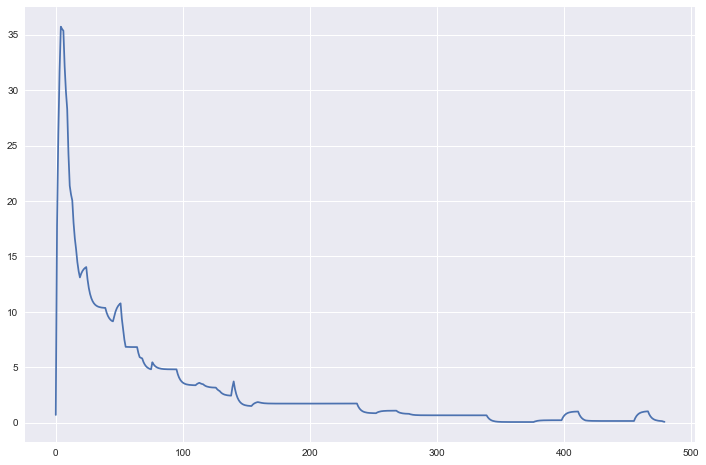

In [20]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for i in range(1, len(series)):
        result.append(alpha * series[i] + (1 - alpha) * result[i - 1])
    return result

smoothed_loss = exponential_smoothing(loss_graph, .3)

plt.figure(figsize=(12, 8))
plt.plot(range(len(smoothed_loss)), smoothed_loss)
plt.show()

#### Momentum method
Stochastic gradient descent with momentum remembers the update of $x$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update
$$x^{k+1} = x^{k} - s^{k},$$ where $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, $0 <\gamma < 1$ – smoothing ratio and $s^{-1} = 0$.

#### Еxercises
1. Find minimum for $Q(x,y)=10x^2+y^2$ with descent method.
2. Use momentum method and compare pathes.
3. How do you choose $\gamma$?

In [21]:
def func(x, y):
    return 10 * x**2 + y**2

def grad(x, y):
    return np.array([20*x, 2*y])

def momentum_gradient_descent(f, df, x_init, step=1e-2, eps=1e-6, gamma=.9, max_iters=10000, path=None):
    delta = 1
    iters_count = 0
    cur_point = x_init
    momentum_term = np.zeros(2)
    while iters_count < max_iters and eps < delta:
        gradient = df(*cur_point)
        new_momentum = gamma * momentum_term + step * gradient
        new_point = cur_point - new_momentum
        delta = np.sqrt(np.sum((new_point - cur_point)**2))

        momentum_term = new_momentum
        cur_point = new_point
        iters_count += 1
        
        if path is not None:
            path = np.append(path, [cur_point], axis=0)
    
    print("Finished... Iterations: ", iters_count)
    if path is None:
        return cur_point
    else:
        return cur_point, path

Finished Iterations: 6098
Finished... Iterations:  568
--------------------------------------------------------------------------------
Descent Local minimum found: 0.00000 at point (0.000, 0.000)
Momentum Local minimum found: 0.00000 at point (0.000, 0.000)


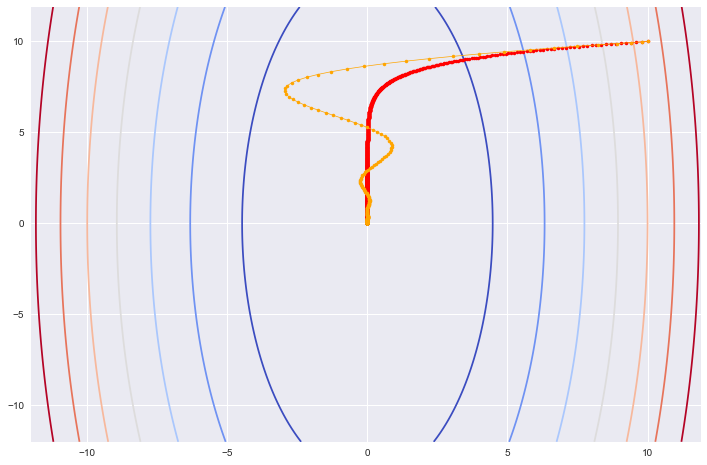

In [22]:
start_point = np.array([10, 10])

descent_min_point, descent_path = gradient_descent(f=func,
                                                   df=grad,
                                                   x_init=start_point,
                                                   step=1e-3,
                                                   eps=1e-7,
                                                   path=np.array([start_point]))

momentum_min_point, momentum_path = momentum_gradient_descent(f=func,
                                                              df=grad,
                                                              x_init=start_point,
                                                              step=1e-3,
                                                              eps=1e-7,
                                                              gamma=0.9,
                                                              path=np.array([start_point]))


print("-"*80)

print("Descent Local minimum found: {0:.5f} "
      "at point ({1[0]:.3f}, {1[1]:.3f})".format(func(*descent_min_point), descent_min_point))


print("Momentum Local minimum found: {0:.5f} "
      "at point ({1[0]:.3f}, {1[1]:.3f})".format(func(*momentum_min_point), momentum_min_point))

x = np.arange(-12.0, 12.0, .1)
y = np.arange(-12.0, 12.0, .1)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

plt.figure(figsize=(12, 8))

plt.contour(X, Y, Z, cmap=cm.coolwarm)
plt.plot(descent_path[:,0], descent_path[:,1], marker='.', color='red', lw=.7)
plt.plot(momentum_path[:,0], momentum_path[:,1], marker='.', color='orange', lw=.7)
plt.show()

_Compare pathes_: we can see, that momentum method converges faster, because it "goes down" faster (closest analogy to this kind )

#### Nesterov accelerated gradient
And the logical development of this approach leads to the accelerated Nesterov's gradient. The descent step is calculated a little differently
$$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - \gamma s^{k-1}),$$
so we find gradient at the point which moment will move us.

#### Еxercises
1. Compare this method and previous with Rosenbrock function.
2. Plot traces of both algorithms.

In [23]:
def nesterov_accelerated_descent(f, df, x_init, step=1e-2, gamma=.5, max_iters=10000, path=None):
    cur_point = x_init
    iters_count = 0
    
    s = np.zeros(2)
    while iters_count < max_iters:
        gradient = df(*(cur_point - gamma * s))
        s = gamma * s + step * gradient
        cur_point = cur_point - s

        iters_count += 1
        path = np.append(path, [cur_point], axis=0)
        
    print("Finished... Iterations: ", iters_count)
    return cur_point, path

Finished... Iterations:  10000
Finished... Iterations:  10000
Momentum descent minimum found: 0.00595 at point (0.923, 0.852)
Nesterov descent minimum found: 0.13262 at point (0.636, 0.403)


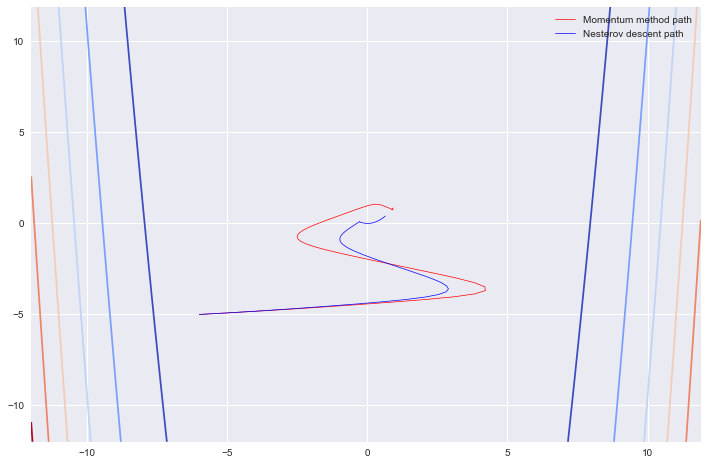

In [24]:
start_point = np.array([-6, -5])

momentum_min_point, momentum_path = momentum_gradient_descent(f=rosenbrock_func,
                                                              df=rosenbrock_grad,
                                                              x_init=start_point,
                                                              step=1e-5,
                                                              gamma=0.9,
                                                              max_iters=10000,
                                                              path=np.array([start_point]))


nesterov_min_point, nesterov_path = nesterov_accelerated_descent(f=rosenbrock_func,
                                                                 df=rosenbrock_grad,
                                                                 x_init=start_point,
                                                                 step=1e-5,
                                                                 gamma=0.9,
                                                                 max_iters=10000,
                                                                 path=np.array([start_point]))

print("Momentum descent minimum found: {0:.5f} "
      "at point ({1[0]:.3f}, {1[1]:.3f})".format(rosenbrock_func(*momentum_min_point), momentum_min_point))
print("Nesterov descent minimum found: {0:.5f} "
      "at point ({1[0]:.3f}, {1[1]:.3f})".format(rosenbrock_func(*nesterov_min_point), nesterov_min_point))

x = np.arange(-12.0, 12.0, .1)
y = np.arange(-12.0, 12.0, .1)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)

plt.figure(figsize=(12, 8))

plt.contour(X, Y, Z, cmap=cm.coolwarm)
plt.plot(momentum_path[:,0], momentum_path[:,1], marker='', color='red', lw=.7, label='Momentum method path')
plt.plot(nesterov_path[:,0], nesterov_path[:,1], marker='', color='blue', lw=.7, label='Nesterov descent path')
plt.legend()
plt.show()

With this starting point Nesterov accelerated gradient descent converged to a global miniumu, wheres momentum method made two big steps at the beggining and thus were unable to converge in $13,000$ iterations.

#### Adagrad (2011)
Adaptive gradient finds lambda for each dimension of the input vector x. Informally speaking, for sparce features it makes a bigger step, but for regular ones smaller step.
$$x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k),$$
* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - epsilon to avoid division by zero.
It improves convergence of the learning process (e.g. when using neural networks for text).

#### RMSprop
To avoid growth of the denominator we can use the following modification. Let's calculate the matrix $G^k$ only for a small number of latest steps, it can be done for example using exponential smoothing.
$$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T},$$
where $0< \gamma < 1$ - smoothing factor

#### Еxercises
1. Read about adadelta and adam (links below).
2. Give an example of a function that can show the difference in the studied stohastic gradient methods.
3. Show animation step by step how methods work.
4. Use your favorite method on mnist dataset again.
5. Show convergence of alrotigthm.
6. Check quality, using holdout.

#### Papers
1. [Adadelta (2012)](https://arxiv.org/pdf/1212.5701.pdf)
2. [Adam (2015)](https://arxiv.org/pdf/1412.6980.pdf)

#### Methods comparison

1.59353503131e-07 [ 0.99960103  0.99920089]


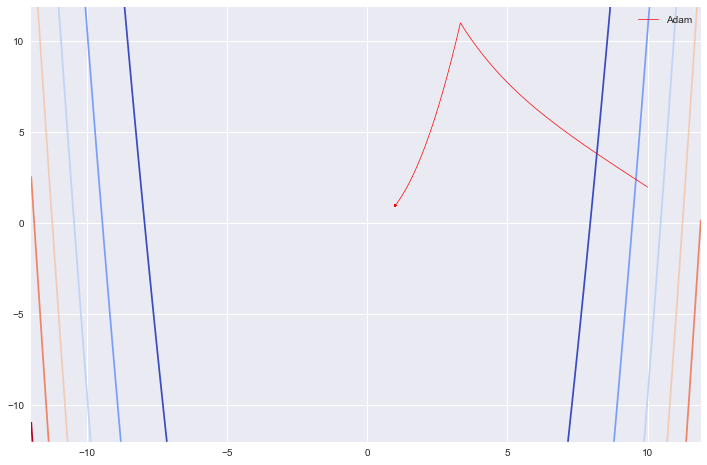

In [72]:
def adagrad(df, x_init, step=1e-4, eps=1e-6, max_iters=10000, path=None):
    delta = 1
    cur_point = x_init
    iters_count = 0
    gradients_hist = np.empty(2)
    
    while max_iters > iters_count and delta > eps:

        gradient = df(*cur_point)
        gradients_hist += gradient**2
        new_point = cur_point - step * gradient / (np.sqrt(gradients_hist) + 1e-6)
           
        delta = np.sqrt(np.sum((new_point - cur_point)**2))
        cur_point = new_point
        iters_count += 1
        
        if path is not None:
            path = np.append(path, [cur_point], axis=0)
        
    return cur_point, path


def rms_prop(df, x_init, step=1e-3, gamma=.9, max_iters=10000, path=None):
    cur_point = x_init
    iters_count = 0
    gradients_hist = np.empty(2)
    
    while max_iters > iters_count:
        gradient = df(*cur_point)
        gradients_hist = gamma * gradients_hist + (1 - gamma) * gradient**2
        cur_point -= step * gradient / (np.sqrt(gradients_hist) + 1e-10)

        iters_count += 1
        
        if path is not None:
            path = np.append(path, [cur_point], axis=0)
    
    return cur_point, path

def adadelta(df, x_init, gamma=.9, max_iters=10000, path=None):
    cur_point = x_init
    iters_count = 0
    
    gradients_hist = np.empty(2)
    
    while iters_count < max_iters:
        iters_count += 1
        gradient = df(*cur_point)
        gradients_hist = gamma * gradients_hist + (1 - gamma) * gradient**2
        
        if path is not None:
            path = np.append(path, [cur_point], axis=0)

    return current_point, path
    

def adam(df, x_init, step=1e-2, beta1=.9, beta2=.99, max_iters=10000, path=None):
    cur_point = x_init
    iters_count = 0
    
    m = np.empty(2)
    v = np.empty(2)
    
    while iters_count < max_iters:
        iters_count += 1
        
        gradient = df(*cur_point)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * gradient**2
        
        mt = m / (1 - beta1**iters_count)
        vt = v / (1 - beta2**iters_count)
        
        cur_point += -step * mt / (np.sqrt(vt) + 1e-8)
        
        if path is not None:
            path = np.append(path, [cur_point], axis=0)
            
    return cur_point, path



start_point=np.array([10.0, 2.0])

adam_point, adam_path = adam(df=rosenbrock_grad,
                             x_init=start_point,
                             step=0.1,
                             beta1=.9,
                             beta2=.999,
                             max_iters=100000,
                             path=np.array([start_point]))


print(rosenbrock_func(*adam_point), adam_point)

x = np.arange(-12.0, 12.0, .1)
y = np.arange(-12.0, 12.0, .1)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)

plt.figure(figsize=(12, 8))

plt.contour(X, Y, Z, cmap=cm.coolwarm)
plt.plot(adam_path[:,0], adam_path[:,1], marker='', color='red', lw=.7, label='Adam')
plt.legend()
plt.show()

### Anime
---

helper functions to 


In [50]:
import base64
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = base64.b64encode(video)
    
    return VIDEO_TAG.format(anim._encoded_video.decode('ascii'))

In [51]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

# animation.Animation._repr_html_ = anim_to_html

In [73]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=30, blit=True)

# call our new function to display the animation
display_animation(anim)